# 의미 연결망 분석(Semantic Network Analysis)

* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석


## n-gram

* `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
* 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
from nltk import word_tokenize, bigrams

sentence = "I love data science and deep learning"
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [69]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


## 어휘 동시 출현 빈도의 계수화

* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [136]:
from nltk import ConditionalFreqDist

s = ["I love data science and natural language process",
     "I do not like language",
     'I love this project',
     "I like science",
     'NLP is natural language process']
tokens = [word_tokenize(x) for x in s]

bigram = [bigrams(x) for x in tokens]

token = []
for i in bigram:
    token += ([x for x in i])

cfd = ConditionalFreqDist(token)

print(cfd.conditions())
for i in cfd.conditions():
    print(cfd[i])

['I', 'love', 'data', 'science', 'and', 'natural', 'language', 'do', 'not', 'like', 'this', 'NLP', 'is']
<FreqDist with 3 samples and 4 outcomes>
<FreqDist with 2 samples and 2 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 2 outcomes>
<FreqDist with 1 samples and 2 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 2 samples and 2 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>


In [137]:
print(cfd['I'])

<FreqDist with 3 samples and 4 outcomes>


In [138]:
print(cfd['I']['love'])        #'I'와 'love'가 동시출현한 빈도수

2


In [139]:
print(cfd['I'].most_common(1))  #'I'와 동시출현한 단어와 빈도수 튜플의 리스트

[('love', 2)]


In [140]:
import numpy as np

freq_matrix = []

for i in cfd.keys():
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)

freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'natural', 'language', 'do', 'not', 'like', 'this', 'NLP', 'is'])
[[0 2 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]]


* 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [141]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,natural,language,do,not,like,this,NLP,is
I,0,2,0,0,0,0,0,1,0,1,0,0,0
love,0,0,1,0,0,0,0,0,0,0,1,0,0
data,0,0,0,1,0,0,0,0,0,0,0,0,0
science,0,0,0,0,1,0,0,0,0,0,0,0,0
and,0,0,0,0,0,1,0,0,0,0,0,0,0
natural,0,0,0,0,0,0,2,0,0,0,0,0,0
language,0,0,0,0,0,0,0,0,0,0,0,0,0
do,0,0,0,0,0,0,0,0,1,0,0,0,0
not,0,0,0,0,0,0,0,0,0,1,0,0,0
like,0,0,0,1,0,0,1,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
* `networkx` 라이브러리를 사용해 해당 행렬을 그래프로 시각화

In [142]:
import networkx as nx

* 앞서 만든 데이터프레임을 그래프로 변환
* 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 함

In [143]:
g = nx.from_pandas_adjacency(df)

print(g.nodes())
print(g.edges())   

['I', 'love', 'data', 'science', 'and', 'natural', 'language', 'do', 'not', 'like', 'this', 'NLP', 'is']
[('I', 'love'), ('I', 'do'), ('I', 'like'), ('love', 'data'), ('love', 'this'), ('data', 'science'), ('science', 'and'), ('science', 'like'), ('and', 'natural'), ('natural', 'language'), ('natural', 'is'), ('language', 'like'), ('do', 'not'), ('not', 'like'), ('NLP', 'is')]


* 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [144]:
#각 엣지에 접근해보면 가중치에 각 단어간 빈도가 사용된 것을 확인 가능
print(g.edges()[('I', 'love')])
print(g.edges()[('I', 'like')])

{'weight': 2}
{'weight': 1}


* `nx.draw`를 통해 간편하게 그래프를 시각화할 수 있음

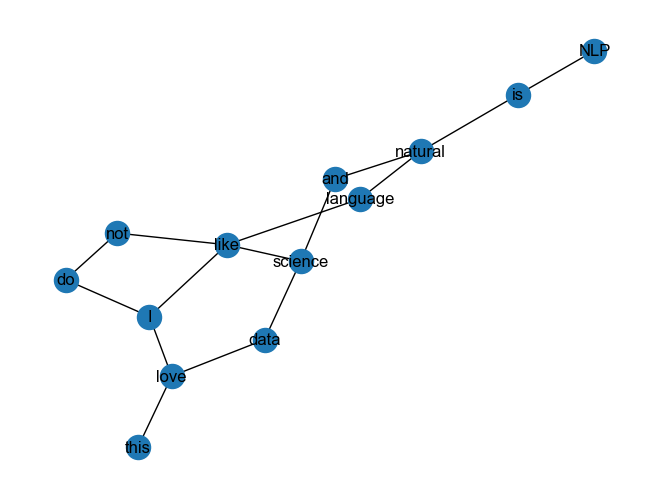

In [145]:
nx.draw(g, with_labels=True)

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [146]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I',
 'love',
 'data',
 'science',
 'and',
 'natural',
 'language',
 'do',
 'not',
 'like',
 'this',
 'NLP',
 'is']

In [147]:
prob_matrix = []

for i in cpd.keys():   #dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix)
print(cpd.keys())
print(prob_matrix) 

dict_keys(['I', 'love', 'data', 'science', 'and', 'natural', 'language', 'do', 'not', 'like', 'this', 'NLP', 'is'])
[[0.   0.5  0.   0.   0.   0.   0.   0.25 0.   0.25 0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]]

In [148]:
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,natural,language,do,not,like,this,NLP,is
I,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000
love,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
natural,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
language,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
do,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
not,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
like,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있음
* 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있음

In [149]:
prob_g = nx.from_pandas_adjacency(df)

print(prob_g.nodes())
print(prob_g.edges())

['I', 'love', 'data', 'science', 'and', 'natural', 'language', 'do', 'not', 'like', 'this', 'NLP', 'is']
[('I', 'love'), ('I', 'do'), ('I', 'like'), ('love', 'data'), ('love', 'this'), ('data', 'science'), ('science', 'and'), ('science', 'like'), ('and', 'natural'), ('natural', 'language'), ('natural', 'is'), ('language', 'like'), ('do', 'not'), ('not', 'like'), ('NLP', 'is')]


In [150]:
print(g.edges()[('I', 'love')])
print(g.edges()[('I', 'like')])
print()
print(prob_g.edges()[('I', 'love')])
print(prob_g.edges()[('I', 'like')])

{'weight': 2}
{'weight': 1}

{'weight': 0.5}
{'weight': 0.25}


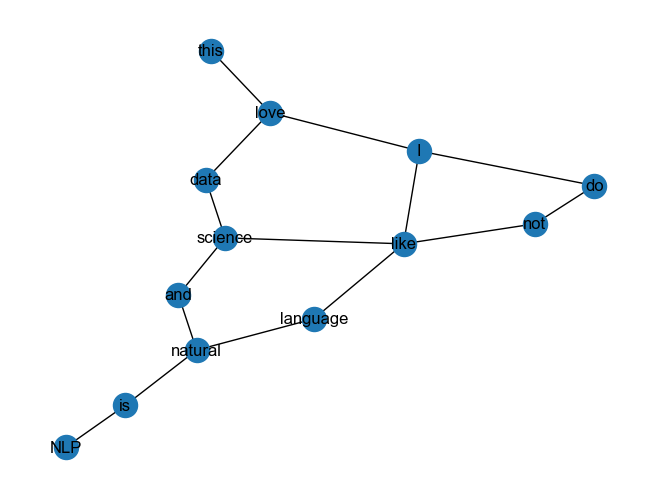

In [151]:
nx.draw(prob_g, with_labels=True)

## 중심성(Centrality) 지수

* 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수
* 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
* 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

### 연결 중심성(Degree Centrality)

* 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표
* 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음
* 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
* 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산

* 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

* 해당 수식을 직접 계산할 수도 있으나,     
`networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존재   

In [152]:
nx.degree_centrality(g)

{'I': 0.25,
 'love': 0.25,
 'data': 0.16666666666666666,
 'science': 0.25,
 'and': 0.16666666666666666,
 'natural': 0.25,
 'language': 0.16666666666666666,
 'do': 0.16666666666666666,
 'not': 0.16666666666666666,
 'like': 0.3333333333333333,
 'this': 0.08333333333333333,
 'NLP': 0.08333333333333333,
 'is': 0.16666666666666666}

### 위세 중심성(Eigenvector Centraility)

* 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
* 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
* 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않음

* 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

* 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산
* `weight`로는 어휘 동시 출현 빈도를 이용

In [153]:
nx.eigenvector_centrality(g, weight='weight')  #어휘 동시출현 빈도를 가중치로

{'I': 0.4628260053292501,
 'love': 0.4106981067829653,
 'data': 0.21527982472298626,
 'science': 0.2567872961025467,
 'and': 0.18038096999616413,
 'natural': 0.3024871689955636,
 'language': 0.324297997783613,
 'do': 0.2131018908582828,
 'not': 0.1979070363067939,
 'like': 0.40051719527923363,
 'this': 0.13245948451122813,
 'NLP': 0.035119469728668404,
 'is': 0.10888772006434562}

### 근접 중심성(Closeness Centrality)


* 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
* 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
* 근접 중심성을 측정하기 위해선 다음과 같이 계산

  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

* 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용

In [154]:
nx.closeness_centrality(g, distance='weight')  #어휘 동시출현 빈도를 가중치로

{'I': 0.35294117647058826,
 'love': 0.3157894736842105,
 'data': 0.36363636363636365,
 'science': 0.46153846153846156,
 'and': 0.3870967741935484,
 'natural': 0.3333333333333333,
 'language': 0.35294117647058826,
 'do': 0.27906976744186046,
 'not': 0.3157894736842105,
 'like': 0.41379310344827586,
 'this': 0.24489795918367346,
 'NLP': 0.21428571428571427,
 'is': 0.26666666666666666}

### 매개 중심성(Betweeness Centrality)

* 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
* 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
* 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며,     
표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눔

* 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

* 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용

In [155]:
nx.betweenness_centrality(g), nx.current_flow_betweenness_centrality(g)

({'I': 0.23484848484848486,
  'love': 0.19696969696969696,
  'data': 0.10606060606060606,
  'science': 0.24242424242424243,
  'and': 0.13636363636363635,
  'natural': 0.3181818181818182,
  'language': 0.2272727272727273,
  'do': 0.022727272727272728,
  'not': 0.05303030303030303,
  'like': 0.4166666666666667,
  'this': 0.0,
  'NLP': 0.0,
  'is': 0.16666666666666669},
 {'I': 0.3236763236763239,
  'love': 0.30985680985680997,
  'data': 0.212787212787213,
  'science': 0.37196137196137224,
  'and': 0.2462537462537463,
  'natural': 0.41142191142191187,
  'language': 0.26490176490176515,
  'do': 0.1218781218781219,
  'not': 0.1333666333666335,
  'like': 0.4881784881784882,
  'this': 2.6914497566670462e-17,
  'NLP': 2.6914497566670462e-17,
  'is': 0.1666666666666671})

### 페이지랭크(PageRank)

* 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
* 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
* 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [156]:
nx.pagerank(g)

{'I': 0.1078897993619454,
 'love': 0.11298994156813372,
 'data': 0.05971973738806695,
 'science': 0.08531046589491685,
 'and': 0.06004937068890028,
 'natural': 0.11454119216178416,
 'language': 0.0830875255911912,
 'do': 0.059910311442182056,
 'not': 0.05986972107874753,
 'like': 0.10762333480809619,
 'this': 0.03554850068006048,
 'NLP': 0.04193642658568426,
 'is': 0.07152367275029084}

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15232\1374782847.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15232\1374782847.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)
C:\Users\master\anaconda3\envs\py38\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


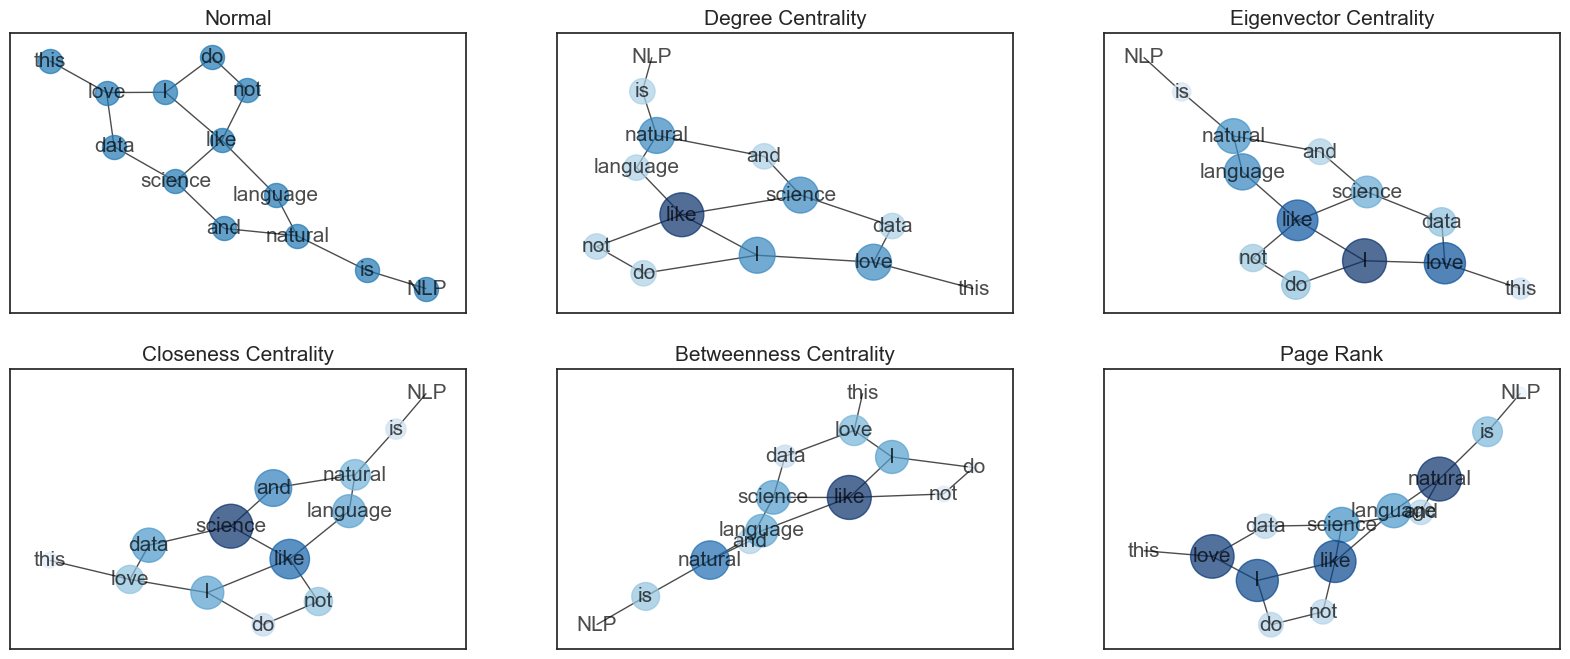

In [157]:
#중심성 종류에 따른 시각화
def get_node_size(node_values):
    n_size = np.array([v for v in node_values])
    n_size = 1000 * (n_size-min(n_size)) / (max(n_size)-min(n_size))   #minmax scale한 결과와 같아짐
    return n_size

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(g).values()
ec = nx.eigenvector_centrality(g, weight='weight').values()
cc = nx.closeness_centrality(g, distance='weight').values()
bc = nx.betweenness_centrality(g).values()
pr = nx.pagerank(g).values()

plt.figure(figsize=(20,8))
plt.axis('off')
plt.subplot(2,3,1)
plt.title('Normal', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(2,3,2)
plt.title('Degree Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(dc), node_size=get_node_size(dc))

plt.subplot(2,3,3)
plt.title('Eigenvector Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(ec), node_size=get_node_size(ec))

plt.subplot(2,3,4)
plt.title('Closeness Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(cc), node_size=get_node_size(cc))

plt.subplot(2,3,5)
plt.title('Betweenness Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(bc), node_size=get_node_size(bc))

plt.subplot(2,3,6)
plt.title('Page Rank', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(pr), node_size=get_node_size(pr));

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15232\2134661427.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


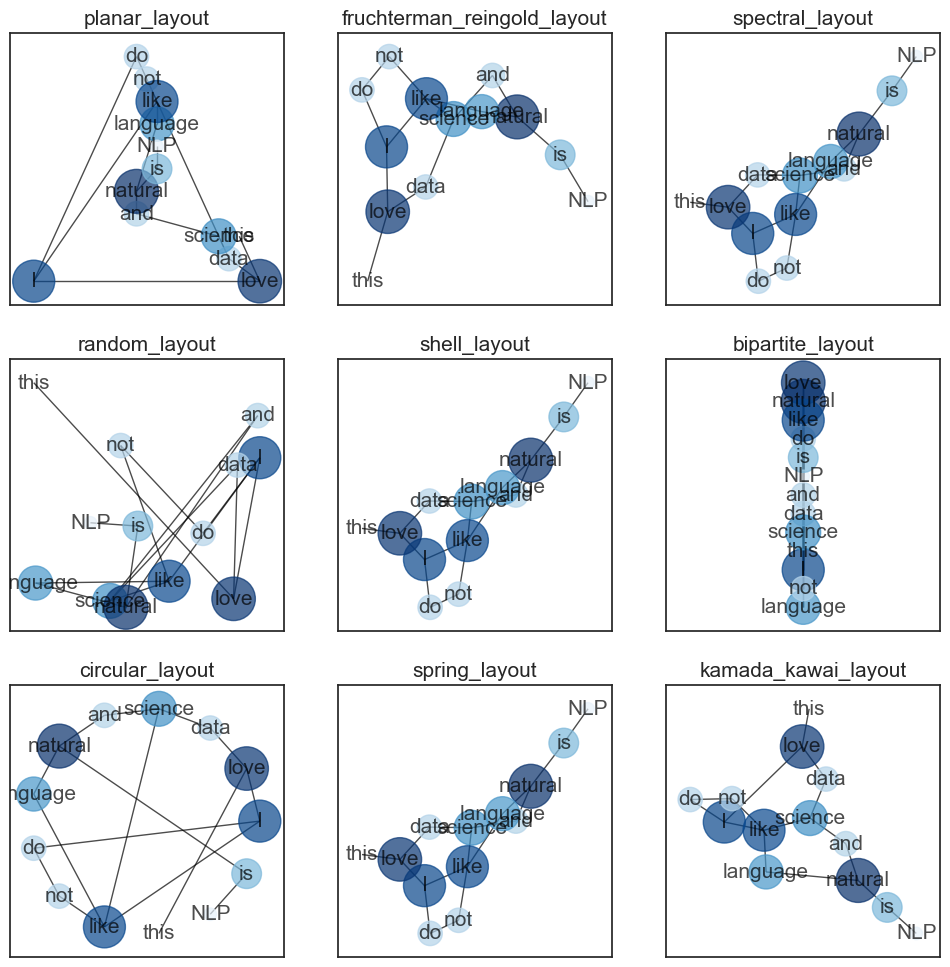

In [158]:
#시각화 방법(layout) 비교
pl = nx.planar_layout(g)
frl = nx.fruchterman_reingold_layout(g)
sl = nx.spectral_layout(g)
rl = nx.random_layout(g)
sl = nx.shell_layout(g)
bl = nx.bipartite_layout(g, g.nodes())
cl = nx.circular_layout(g)
sl = nx.spring_layout(g)
kkl = nx.kamada_kawai_layout(g)

pos = [pl, frl, sl, rl, sl, bl, cl, sl, kkl]
titles = ['planar_layout', 'fruchterman_reingold_layout', 'spectral_layout',
          'random_layout', 'shell_layout', 'bipartite_layout',
          'circular_layout', 'spring_layout', 'kamada_kawai_layout']
option = {'font_size':15, 
          'alpha':0.7, 
          'cmap':plt.cm.Blues,
          'node_color':list(pr), 
          'node_size':get_node_size(pr)}

plt.figure(figsize=(12,12))
plt.axis('off')

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(titles[i], fontsize=15)
    nx.draw_networkx(g, pos=pos[i], **option)